Ricardo Ferraro Peres - C

Pergunta a ser respondida:
Qual é o impacto da corrupção e das dívidas externas no IDH dos países?

Nota: Os dados coletados são referentes ao ano de 2008.

Sobre os índices:

Cpi: O indice de CPI faz uma compilação de casos abuso de dinheiro público para benefício privado nos países do mundo. O índice é registrado em uma escala de zero a dez onde quanto mais próximo de zero, mais corrupto é o país e quanto mais próximo de dez, menos corrupto é o país.

Dívida externa (Debt_idx): Este índice é feito a partir da soma das dívidas públicas e privadas dos países, medido em dólar americano. Os valores são em porcentagem comparado ao PIB de cada país.

IDH (Índice de desenvolvimento humano): Medido a partir de outros três índices, sendo eles: nível de saúde, educação e expectativa de vida. É medido em uma escala de zero a um.

IDH menor que 0,550: baixo desenvolvimento humano;
IDH entre 0,551 e 0,699: médio desenvolvimento humano;
IDH entre 0,700 e 0,799: alto desenvolvimento humano;
IDH acima de 0,800: muito alto desenvolvimento humano.


fonte: https://www.todapolitica.com/idh/

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [31]:
cpi = pd.read_excel('indicator ti cpi 2009.xlsx')  
debt = pd.read_excel('debt_to_foreign.xlsx')  
IDH = pd.read_excel('Indicator_HDI.xlsx') 

In [32]:
cpi2008 = cpi.iloc[:, :2]
cpi_idx = cpi2008.set_index('Country')

debt2008 = debt.loc[:, ["geo", 2008]]
debt_idx = debt2008.set_index("geo")

IDH2008 = IDH.loc[:, ["HDI", 2008]]
IDH_idx = IDH2008.set_index("HDI")

             2008
count  180.000000
mean     4.031111
std      2.096853
min      1.100000
25%      2.500000
50%      3.300000
75%      5.125000
max      9.400000


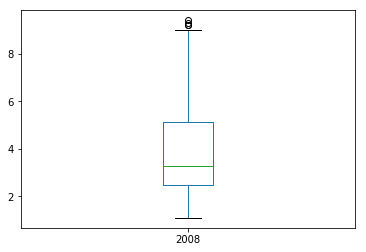

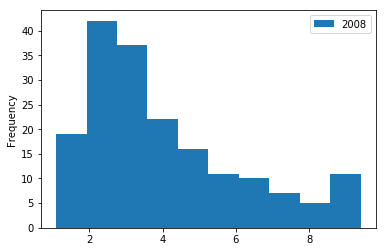

In [64]:
print(cpi2008.describe())
cpi2008.plot.box()
cpi2008.plot.hist()


Analise do índice cpi:



             2008
count  119.000000
mean    43.997479
std     48.670988
min      3.680000
25%     21.000000
50%     31.100000
75%     55.850000
max    458.000000


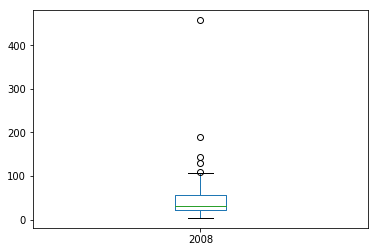

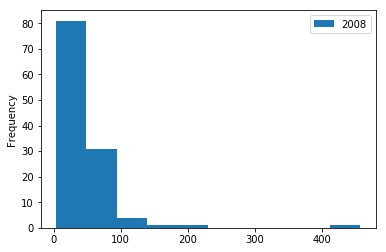

In [56]:
print(debt_idx.describe())
debt_idx.plot.box()
debt_idx.plot.hist()

Análise debt:


In [36]:
DATA = IDH_idx.join(cpi_idx, how='inner', lsuffix='_IDH', rsuffix='_Corruption')

In [37]:
DT = DATA.join(debt_idx, how = "inner")
DT=DT.rename(index=str,columns={2008:"2008_Debt"})

Ajuste linear entre X3 e X4:
Coeficiente linear: -1.6718273383797833
Coeficiente angular: 8.740241158188317


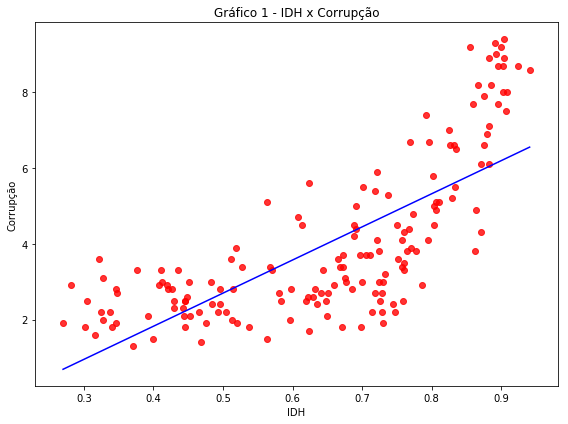

,2008_IDH,2008_Corruption
2008_IDH,1.000000,0.740279
2008_Corruption,0.740279,1.000000


In [61]:
#plotando os índices de corrupção com idh.
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico 1 - IDH x Corrupção')
    plt.xlabel('IDH')
    plt.ylabel('Corrupção')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()
reta(DATA["2008_IDH"], DATA["2008_Corruption"])
DATA.corr(method='pearson')

In [59]:
#plotando IDH com dívida externa.
def reta2(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico 2 - IDH x Dívida externa')
    plt.xlabel('2008_IDH')
    plt.ylabel('2008_Debt')
    plt.ylim(0, 100)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()


Ajuste linear entre X3 e X4:
Coeficiente linear: 59.14519416471512
Coeficiente angular: -29.620153787877857


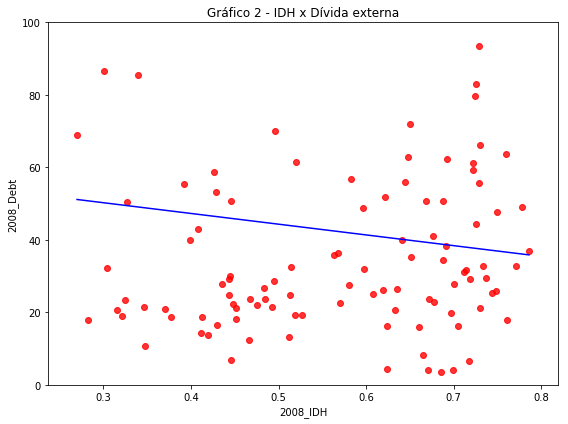

In [60]:
reta2(DT["2008_IDH"], DT["2008_Debt"])

Ajuste linear entre X3 e X4:
Coeficiente linear: 42.97203163935442
Coeficiente angular: -0.18592147100302814


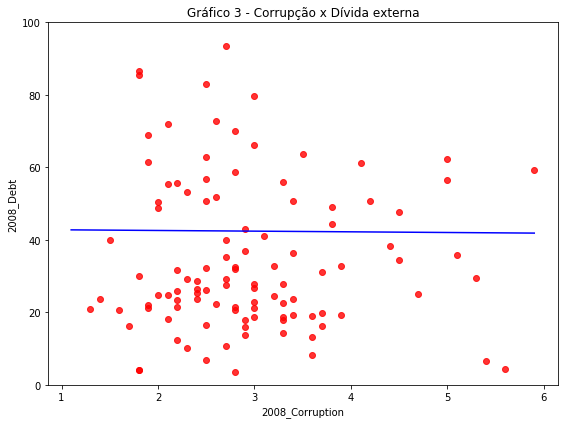

,2008_IDH,2008_Corruption,2008_Debt
2008_IDH,1.000000,0.435659,-0.088085
2008_Corruption,0.435659,1.000000,-0.003616
2008_Debt,-0.088085,-0.003616,1.000000


In [40]:
#plotando corrupção com dívida externa
def reta3(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title("Gráfico 3 - Corrupção x Dívida externa")
    plt.xlabel('2008_Corruption')
    plt.ylabel('2008_Debt')
    plt.ylim(0, 100)
    

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()
reta3(DT["2008_Corruption"], DT["2008_Debt"])
DT.corr(method='pearson')


tabela-1:
A partir da correlação confirmada pelo gráfico 1, é possível analisar a tabela abaixo que identifica os principais países que tem o índice de corrupção baixo e um IDH superior a 0.8. Dentre os países da lista, pode-se destacar a Dinamarca, que é um pais que á séculos toma medidas de combate a corrupção como cortar privilégios de cargos públicos, baixar a impunidade entre outros.

nota: Lembrando que em uma escala de zero a dez, quanto mais próximo de dez, menos corrupto é o país.

fonte: https://www.bbc.com/portuguese/noticias/2016/01/160126_dinamarca_corrupcao_fm_ab

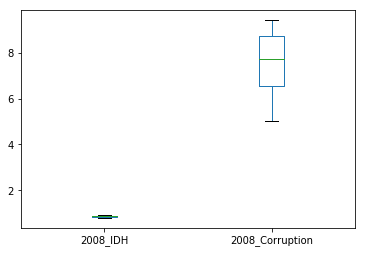

In [65]:
A = DATA[(DATA["2008_IDH"] >= 0.8) & (DATA["2008_Corruption"] >= 5)]
A


Tabela-2
A tabela abaixo nos permite identificar os principais países que possuem o IDH baixo e um índice de corrupção alto. Analisando a tabela, pode-se perceber que a grande maioria dos países que se encontram na situação descrita, estão localizados na África.


In [54]:
B = DATA[(DATA["2008_IDH"] <= 0.6) & (DATA["2008_Corruption"] <= 5)]
B

,2008_IDH,2008_Corruption
Afghanistan,0.370,1.3
Angola,0.476,1.9
Bangladesh,0.484,2.4
Benin,0.419,2.9
Burkina Faso,0.321,3.6
Burundi,0.301,1.8
Cambodia,0.513,2.0
Cameroon,0.466,2.2
Central African Republic,0.327,2.0
Chad,0.316,1.6


tabela-3: Utilizando o filtro abaixo, foi possível plotar a tabela a seguir confirma a relação do gráfico-1, mostrando que apenas 2% dos países analisados possuem a dinâmica de ter o IDH alto e o índice de corrupção baixo.
A Itália, por exemplo, é um país Europeu que está enfrentando uma enorme crise financeira. Uma das razões, como aponta Nick Squires do jornal "The Telegraph" é a alta corrupção que tomou conta do país.


In [53]:
C = DATA[(DATA["2008_IDH"] >= 0.8) & (DATA["2008_Corruption"] <= 5)]
C

,2008_IDH,2008_Corruption
Czech Republic,0.864,4.9
Greece,0.862,3.8
Italy,0.871,4.3
Latvia,0.803,4.5
Lithuania,0.806,4.9
Poland,0.804,5.0


Conclusão:
    Após a análise dos dados foi possível concluir que os índices de desenvolvimento humano e corrupção estão relacionados da seguinte forma: Em geral, os países com o índice de corrupção alto possuem um IDH baixo e os países com índice de corrupção baixo, tem o IDH elevado. Esta relação é confirmada pela análise gráfico-1 e pelo uso do método corr que calculou uma correlação de 0.740279.
    
 Além da análise dos dados existem também diversos estudos que indicam está relação. O artigo de Elvin Mirzayev, "How Corruption Affects Emerging Economies", cita alguns dos fatores gerados pela corrupção que impedem o desenvolvimento dos quais pode-se destacar a falta de investimentos estrangeiros (já que a baixa confiança) e também poucos recursos aplicados às áreas de tecnologia, saúde e educação. 
    
   Ao comparar os índices de desenvolvimento humano e dívida externa, não foi possível estabelecer relação, uma vez que os dados (como pode ser verificado no gráfico 2) estão muito dispersos, o que produz uma correlação muito baixa. De forma semelhante, não foi possível verificar relação direta entre os índices de corrupção e dívida externa.  
   
   **Observação:
Foram criados dois data-frames diferentes para fazer a análise porque ao juntar os três índices, a análise estava sendo prejudicada pelo fato de o índice de dívida externa conter menos dados.
